In [4]:
import pandas as pd
# Load the data into a DataFrame
data_path = 'c:/dataset/student-por.csv'
data_renee = pd.read_csv(data_path, sep=';')

In [5]:
# a. Check the names and types of columns

column_types = data_renee.dtypes
print(column_types)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [6]:
# b. Check the missing values
missing_values = data_renee.isnull().sum()
print(missing_values)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [7]:

# c. Check the statistics of the numeric fields
numeric_stats = data_renee.describe()
print("\nStatistics of numeric fields:\n", numeric_stats)



Statistics of numeric fields:
               age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.53621

In [8]:

# d. Check the categorical values
categorical_values = data_renee.select_dtypes(include=['object']).nunique()
print("\nCount of unique values in each categorical column:\n", categorical_values)



Count of unique values in each categorical column:
 school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64


In [9]:
# Perform the checks
column_types, missing_values, numeric_stats, categorical_values

(school        object
 sex           object
 age            int64
 address       object
 famsize       object
 Pstatus       object
 Medu           int64
 Fedu           int64
 Mjob          object
 Fjob          object
 reason        object
 guardian      object
 traveltime     int64
 studytime      int64
 failures       int64
 schoolsup     object
 famsup        object
 paid          object
 activities    object
 nursery       object
 higher        object
 internet      object
 romantic      object
 famrel         int64
 freetime       int64
 goout          int64
 Dalc           int64
 Walc           int64
 health         int64
 absences       int64
 G1             int64
 G2             int64
 G3             int64
 dtype: object,
 school        0
 sex           0
 age           0
 address       0
 famsize       0
 Pstatus       0
 Medu          0
 Fedu          0
 Mjob          0
 Fjob          0
 reason        0
 guardian      0
 traveltime    0
 studytime     0
 failures      0
 sc

****************Pre-process and Prepare the Data for Machine Learning

In [10]:
# Create a new target variable 'pass_renee'
data_renee['pass_renee'] = ((data_renee['G1'] + data_renee['G2'] + data_renee['G3']) >= 35).astype(int)
print(data_renee[data_renee['pass_renee'] == 1])

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
5       GP   M   16       U     LE3       T     4     3  services     other   
6       GP   M   16       U     LE3       T     2     2     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
634     MS   F   18       U     GT3       T     3     3     other     other   
636     MS   M   18       U     GT3       T     4     4   teacher   teacher   
638     MS   M   17       U     GT3       T     2     3     other  services   
641     MS   F   18       R     GT3       T     2     2   at_home     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   

     ... freetime goout  Dalc  Walc  health absence

In [11]:
#. Drop the columns G1, G2, G3 permanently
data_renee.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)
print(data_renee.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0       no       no       4         3      4    1    1      3        4   
1      yes       no       5         3      3    1    1      3        2   
2      yes       no       4         3      2    2    3      3        6   
3      yes      yes       3         2      2    1    1      5        0   
4       no       no       4         3      2    1    2      5        0   

  pass_renee  
0          0  
1          0  
2          1  
3       

In [12]:
# 5. Separate the features from the target variable
features_renee = data_renee.drop('pass_renee', axis=1)
target_variable_renee = data_renee['pass_renee']
print(features_renee.head())
print(target_variable_renee.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1      3        4  
1    yes      yes        no       5         3     3    1    1      3        2  
2    yes      yes        no       4         3     2    2    3      3        6  
3    yes      yes       yes       3         2     2    1    1      5        0  
4    yes       no        no       4         3     2    1    2      5        0  

[5 rows x 30 columns]
0    0
1  

In [13]:
# 6. Print out the total number of instances in each class
class_distribution = target_variable_renee.value_counts()
print("\nTotal number of instances in each class:\n", class_distribution)




Total number of instances in each class:
 pass_renee
1    328
0    321
Name: count, dtype: int64


In [14]:
# 7. Create two lists for numeric and categorical fields
numeric_features_renee = features_renee.select_dtypes(include=['int64']).columns.tolist()
cat_features_renee = features_renee.select_dtypes(include=['object']).columns.tolist()
print("Numeric features:", numeric_features_renee)
print("Categorical features:", cat_features_renee)

Numeric features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


********************Prepare Column Transformer and Classifier


In [15]:
# 8. Prepare a column transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer_renee = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), cat_features_renee)
], remainder='passthrough')


In [17]:
# 9. Prepare a classifier decision tree model
from sklearn.tree import DecisionTreeClassifier
clf_renee = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf_renee


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [18]:
# 10. Build a pipeline
from sklearn.pipeline import Pipeline
pipeline_first_renee = Pipeline(steps=[
    ('transformer', transformer_renee),
    ('classifier', clf_renee)
])


In [20]:
# 11. Split your data into train and test sets
from sklearn.model_selection import train_test_split

# Split the data
X_train_renee, X_test_renee, y_train_renee, y_test_renee = train_test_split(
    features_renee, target_variable_renee, test_size=0.2, random_state=5)
(X_train_renee.shape, X_test_renee.shape, y_train_renee.shape, y_test_renee.shape)


((519, 30), (130, 30), (519,), (130,))

****************** Build Classification Models

In [21]:
# 12. Fit the training data to the pipeline
pipeline_first_renee.fit(X_train_renee, y_train_renee)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5))])

In [28]:
# 13. Cross-validate the output on the training data using 10-fold cross-validation
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10, shuffle=True, random_state=5)
cv_scores = cross_val_score(pipeline_first_renee, X_train_renee, y_train_renee, cv=cv, n_jobs=-1)

[0.65384615 0.71153846 0.73076923 0.69230769 0.69230769 0.71153846
 0.76923077 0.65384615 0.71153846 0.66666667]
Mean cross-validation score:  0.6993589743589743


In [29]:
# 14. Print out the ten scores and the mean of the ten scores
# Assuming cv_scores is the array of cross-validation scores from step 13
print(cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())

[0.65384615 0.71153846 0.73076923 0.69230769 0.69230769 0.71153846
 0.76923077 0.65384615 0.71153846 0.66666667]
Mean cross-validation score:  0.6993589743589743


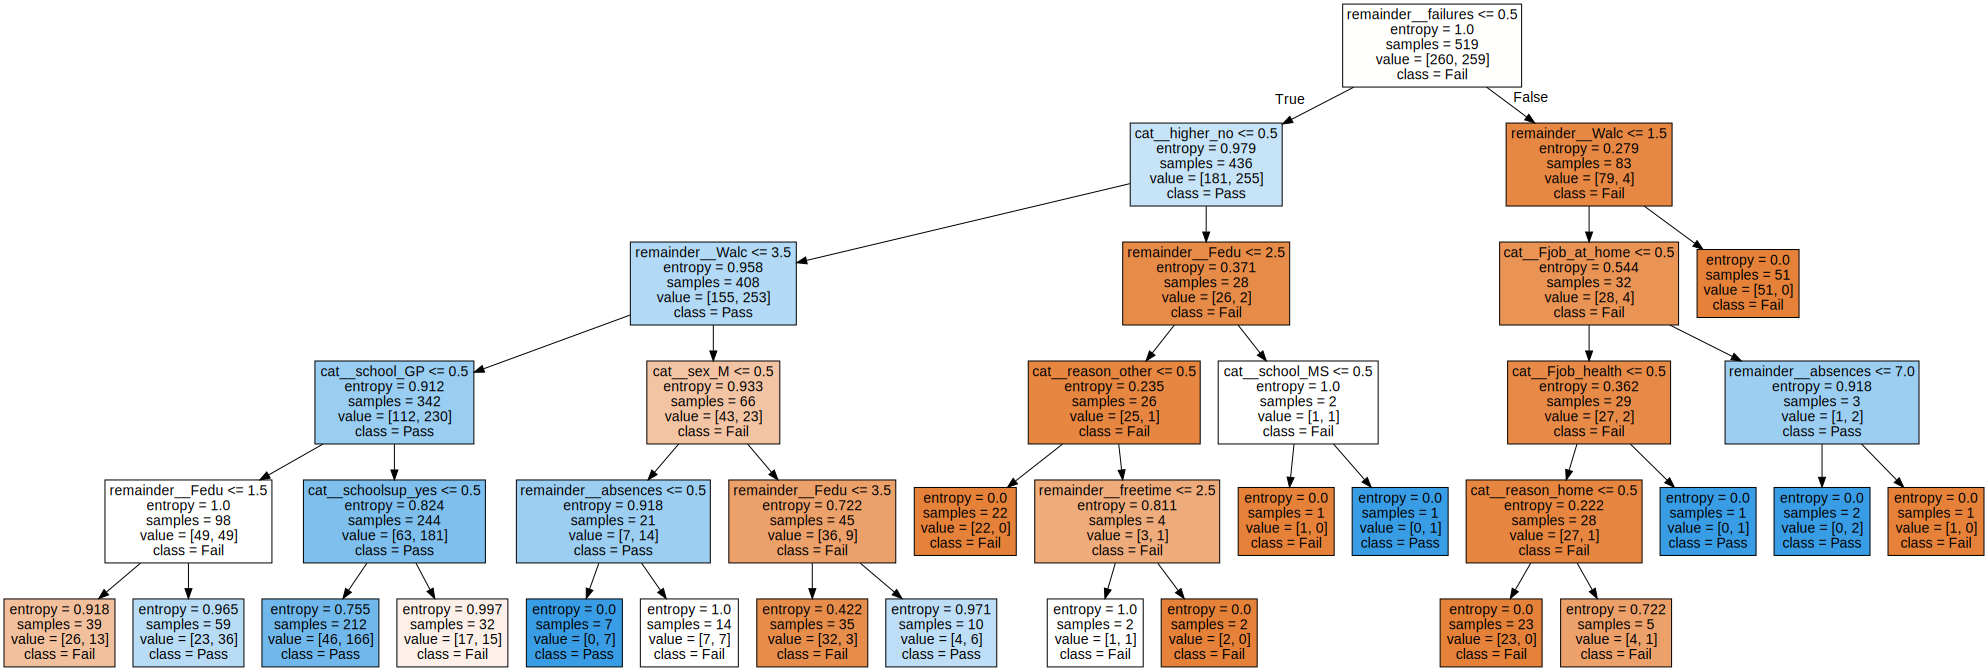

In [35]:
# 15. Visualize the tree using Graphviz
from sklearn.tree import export_graphviz
import graphviz

# Extract the decision tree from the fitted pipeline
tree = pipeline_first_renee.named_steps['classifier']

# Export the tree to a Dot format
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=transformer_renee.get_feature_names_out(),
                           class_names=["Fail", "Pass"], 
                           filled=True)

# Use Graphviz to visualize the tree
graph = graphviz.Source(dot_data)
graph


In [ ]:
# 16. Save the tree to a .png file
graph.render("decision_tree")

In [ ]:
# 17. Describe the key findings for the first level split


In [36]:
# 18. Print out two accuracy scores
from sklearn.metrics import accuracy_score

# Predictions on training and test set
y_train_pred = pipeline_first_renee.predict(X_train_renee)
y_test_pred = pipeline_first_renee.predict(X_test_renee)

# Accuracy scores
train_accuracy = accuracy_score(y_train_renee, y_train_pred)
test_accuracy = accuracy_score(y_test_renee, y_test_pred)

print("Training accuracy: ", train_accuracy)
print("Testing accuracy: ", test_accuracy)


Training accuracy:  0.7822736030828517
Testing accuracy:  0.6307692307692307


In [38]:
# 19. Use the model to predict the test data and print out evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Evaluation metrics
accuracy = accuracy_score(y_test_renee, y_test_pred)
precision = precision_score(y_test_renee, y_test_pred)
recall = recall_score(y_test_renee, y_test_pred)
conf_mat = confusion_matrix(y_test_renee, y_test_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("Confusion Matrix:\n", conf_mat)


Accuracy:  0.6307692307692307
Precision:  0.64
Recall:  0.6956521739130435
Confusion Matrix:
 [[34 27]
 [21 48]]


************Fine tune the model

In [41]:
# 20.	Using Randomized grid search fine tune your model
from sklearn.model_selection import RandomizedSearchCV
import joblib


# Define the parameter grid
parameters = {
    'classifier__min_samples_split': range(10, 300, 20),
    'classifier__max_depth': range(1, 30, 2),
    'classifier__min_samples_leaf': range(1, 15, 3)
}


random_search = RandomizedSearchCV(estimator=pipeline_first_renee,
                                   param_distributions=parameters,
                                   scoring='accuracy',
                                   cv=5,
                                   n_iter=7,
                                   refit=True,
                                   verbose=3)
# 

In [46]:
# 21. Fit the training data to the grid search object
random_search.fit(X_train_renee, y_train_renee)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END classifier__max_depth=29, classifier__min_samples_leaf=1, classifier__min_samples_split=190;, score=0.712 total time=   0.0s
[CV 2/5] END classifier__max_depth=29, classifier__min_samples_leaf=1, classifier__min_samples_split=190;, score=0.731 total time=   0.0s
[CV 3/5] END classifier__max_depth=29, classifier__min_samples_leaf=1, classifier__min_samples_split=190;, score=0.673 total time=   0.0s
[CV 4/5] END classifier__max_depth=29, classifier__min_samples_leaf=1, classifier__min_samples_split=190;, score=0.692 total time=   0.0s
[CV 5/5] END classifier__max_depth=29, classifier__min_samples_leaf=1, classifier__min_samples_split=190;, score=0.650 total time=   0.0s
[CV 1/5] END classifier__max_depth=29, classifier__min_samples_leaf=13, classifier__min_samples_split=250;, score=0.712 total time=   0.0s
[CV 2/5] END classifier__max_depth=29, classifier__min_samples_leaf=13, classifier__min_samples_split=250;, sco

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OneHotEncoder(),
                                                                               ['school',
                                                                                'sex',
                                                                                'address',
                                                                                'famsize',
                                                                                'Pstatus',
                                                                                'Mjob',
                                                                                'Fjob',
                                                                                'reason',
                                                                                'guardian',
                                                                                'schoolsup',
                                                                                'famsup',
                                                                                'paid',
                                                                                'activities',
                                                                                'nursery',
                                                                                'higher',
                                                                                'internet',
                                                                                'romantic'])])),
                                             ('classifier',
                                              DecisionTreeClassifier(criterion='entropy',
                                                                     max_depth=5))]),
                   n_iter=7,
                   param_distributions={'classifier__max_depth': range(1, 30, 2),
                                        'classifier__min_samples_leaf': range(1, 15, 3),
                                        'classifier__min_samples_split': range(10, 300, 20)},
                   scoring='accuracy', verbose=3)

In [45]:
# 23. Print out the score of the best model
print("Best score:", random_search.best_score_)

Best score: 0.6974047796863332


In [47]:
from sklearn.model_selection import GridSearchCV
import joblib

# Definir el espacio de parámetros para GridSearchCV
param_grid = {
    'classifier__min_samples_split': range(10, 300, 20),
    'classifier__max_depth': range(1, 30, 2),
    'classifier__min_samples_leaf': range(1, 15, 3)
}

# Configuración de GridSearchCV
grid_search = GridSearchCV(estimator=pipeline_first_renee,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           refit=True,
                           verbose=3)

# 21.	Fit your training data to the gird search object
grid_search.fit(X_train_renee, y_train_renee)

# 22.	Print out the best parameters
print("Best Parameters:", grid_search.best_params_)

# 23.	Print out the score of the model and note 
print("Best score:", grid_search.best_score_)

# 24.	Printout the best estimator and note it 
print("Best Estimator:", grid_search.best_estimator_)




Fitting 5 folds for each of 1125 candidates, totalling 5625 fits
[CV 1/5] END classifier__max_depth=1, classifier__min_samples_leaf=1, classifier__min_samples_split=10;, score=0.596 total time=   0.0s
[CV 2/5] END classifier__max_depth=1, classifier__min_samples_leaf=1, classifier__min_samples_split=10;, score=0.625 total time=   0.0s
[CV 3/5] END classifier__max_depth=1, classifier__min_samples_leaf=1, classifier__min_samples_split=10;, score=0.663 total time=   0.0s
[CV 4/5] END classifier__max_depth=1, classifier__min_samples_leaf=1, classifier__min_samples_split=10;, score=0.692 total time=   0.0s
[CV 5/5] END classifier__max_depth=1, classifier__min_samples_leaf=1, classifier__min_samples_split=10;, score=0.641 total time=   0.0s
[CV 1/5] END classifier__max_depth=1, classifier__min_samples_leaf=1, classifier__min_samples_split=30;, score=0.596 total time=   0.0s
[CV 2/5] END classifier__max_depth=1, classifier__min_samples_leaf=1, classifier__min_samples_split=30;, score=0.625 to

In [48]:
# 25.	Fit the test data using the fine-tuned model identified during grid search i.e the best estimator 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

y_pred = grid_search.best_estimator_.predict(X_test_renee)

accuracy = accuracy_score(y_test_renee, y_pred)
precision = precision_score(y_test_renee, y_pred)
recall = recall_score(y_test_renee, y_pred)
conf_matrix = confusion_matrix(y_test_renee, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.6461538461538462
Precision: 0.6455696202531646
Recall: 0.7391304347826086
Confusion Matrix:
 [[33 28]
 [18 51]]


In [49]:
# 27.	Save the model using the joblib (dump)
joblib.dump(grid_search.best_estimator_, 'final_model_renee.pkl')

['final_model_renee.pkl']

In [50]:
# 28.	Save the full pipeline using the joblib – (dump).
joblib.dump(pipeline_first_renee, 'full_pipeline_renee.pkl')

['full_pipeline_renee.pkl']